<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2018, семинар 7 </span> 

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models
<h3> Plan </h3>


* **SVM: theory (20 minute) **

 - Learning algorithm
 - Kernel Trick
 - <span style="color:orange">MultiClasss SVM</span>
 
 
* **SVM: example of realization (40 minute) **
 - SVM в Sklearn
 - Реализация simple SVM
 - True SVM
 
 
* ** Use cases (20 minute)**
 - Use case: Budget optimization
 - HW2: solution
 - HW5: explanation
 - <span style="color:orange">Vowpal Wabbit</span>

** Key words **: 
 * SVM, опорный вектор, разделяющая гиперплоскость, Margin
 * ядро, гауссовское ядро, полиномиальное ядро
 * мультиклассовый SVM

In [1]:
import os
import numpy as np
import seaborn as sns
# import _pickle as pickle  # use for Python 2: import cPickle as pickle
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.pyplot import plot, contourf, clabel, contour

from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups, make_classification
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
import random
# from IPython.display import Image, SVG
from scipy import optimize

-------
<h1 align="center">SVM</h1> 

# SVM для линейных выборок

** Вопросы **
* В чём основная идея SVM? 
* Напишите задачу квадратичной оптимизации, соответствующую SVM
* Как функция штрафа используется в SVM?
* Какой метод регуляризации используется в SVM? 
* Что такое 
    - разделяющая гиперплоскость
    - опорный вектор
    - Margin?
* Как обучаются $w$ методом SVM?

<center> Svm_max_sep_hyperplane_with_margin.png </center>
<img src="http://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width="40%">

### Quadratic Programming (QP) Problem:

## $$ b = w_0 $$

## $$ \min_{i = 1, \ldots, l} y_i (<w, x_i> - w_0)  = 1 $$

Linear Separability

## \begin{cases}
    <w, w> \to \min\limits_{w} \\
    y_i (<w, x_i> - w_0) \geq 1, i = 1, \ldots, l
\end{cases}

Linear Inseparability

## \begin{cases}
    \frac{1}{2} <w, w> + C \sum\limits_{i=1}^{l} \xi_i \to \min\limits_{w, \xi} \\
    y_i (<w, x_i> - w_0) \geq 1 - \xi_i, i = 1, \ldots, l \\
    \xi_i \geq 0, i = 1, \ldots, l
\end{cases}

## Linear Model Equivalence

$$ Q(w, w_0) = \sum\limits_{i=1}^{l} (1 - M_i(w, w_0))_{+} + \frac{1}{2C} {\|w\|}^2 \to \min\limits_{w, w_0} $$

### Dual Form

Before:
## \begin{cases}
    \sum f(x_i) \to \min\limits_{x} \\
    h(x_i) \geq 0, i = 1, \ldots, n
\end{cases}

After:
## \begin{cases}
    \sum f(x_i) - \lambda_i h(x_i) \to \min\limits_{x} \max\limits_{\lambda} \\
    h(x_i) \geq 0, i = 1, \ldots, n \\
    \lambda_i \geq 0, i = 1, \ldots, n \\
    \lambda_i = 0 \ or \  h(x_i) = 0 \ (\sum \lambda_i h(x_i) = 0)
\end{cases}

Calculate derivatives over x and see corollary.


## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j <x_i, x_j> \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### Decision Rule

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i <x_i, x> - w_0 \right) $$
## $$ w_0 = med \{ <w, x_i> - y_i \ |\  \lambda_i > 0 \} $$


--------
# Non-Linear SVM (Kernel Trick)

** Вопросы **
  * Как с помощью SVM разделить нелинейную выборку?
  * Что такое ядро?
  * Примеры ядер?
  * Как строить ядра?
  * Применение ядер для классификации нелинейных выборок

Kernel fuction 
## $$ K : X \times X \to R $$ 
if $ K(x, x') = <\phi(x), \phi(x')> $, where $ \phi : X \to H $ and H is space with inner product

### Kernel_Machine
<img src="http://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png" width="80%">

** Kernel trick **
## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j \color{red}{K(x_i, x_j)} \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i \color{red}{K(x_i, x)} - w_0 \right) $$
## $$ w_0 = med \{ \color{red}{K(w, x_i)} - y_i \ |\  \lambda_i > 0 \} $$

### Kernel and Building kernels
<img src='https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/Kernel.PNG' align="left" width="70%">

<!---                             .
                            T
                           ( )
                          <===>
                           F|J
                           ===
                          J|||F
                          F|||J
                         /\/ \/\
                         F+++++J
                        J{}{|}{}F         .
                     .  F{}{|}{}J         T
          .          T J{}{}|{}{}F        ;;
          T         /|\F/\/\|/\/\J  .   ,;;;;.
         /:\      .'/|\\:=========F T ./;;;;;;\
       ./:/:/.   ///|||\\\"""""""" /x\T\;;;;;;/
      //:/:/:/\  \\\\|////..[ ]...xXXXx.|====|
      \:/:/:/:T7 :.:.:.:.:||[ ]|/xXXXXXx\|||||
      ::.:.:.:A. `;:;:;:;'=== ==\XXXXXXX/=====.
      `;""::/xxx\.|,|,|,| ( ) ( )| | | |.=..=.|
       :. :`\xxx/(_)(_)(_) _   _ | | | |'-''-'|
       :T-'-.:"":|"""""""|/ \ / \|=====|======|
       .A."""||_|| ,. .. || | | |/\/\/\/ | | ||
   :;:////\:::.'.| || || ||-| |-|/\/\/\+|+| | |
  ;:;;\////::::,='======='=============/\/\=====.
 :;:::;""":::::;:|__..,__|============/||\|\====|
 :::::;|=:::;:;::|,;:::::          |========|   |
 ::l42::::::(}:::::;::::::_________|========|___|_
--->

### Example of Kernels
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/KernelExample.PNG" align="left" width="60%">

** Задача 1**:  Какое ядро приведёт к линеаризации следующего датасета?

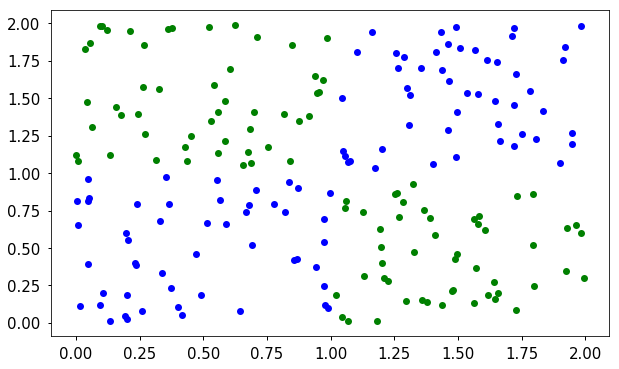

In [95]:
c1_trickyset = np.vstack((np.random.uniform(size=100).reshape((50,2)), np.random.uniform(size=100).reshape((50,2)) + 1)) 
plt.figure(figsize=(10, 6))
plot(c1_trickyset[:,0], c1_trickyset[:,1], 'bo')

y1 = np.random.uniform(size=100).reshape((50,2))
y2 = np.random.uniform(size=100).reshape((50,2))
y1[:,0] += 1
y2[:,1] += 1
c2_trickyset =np.vstack((y1,y2)) 

plot(c2_trickyset[:,0], c2_trickyset[:,1], 'go')

In [102]:
X_train_trickyset = np.vstack((c1_trickyset, c2_trickyset))
Y_train_trickyset = np.hstack(([1]*len(c1_trickyset), [-1]*len(c2_trickyset)))

** Задача 2**:   Какое ядро приведёт к линеаризации следующего датасета?

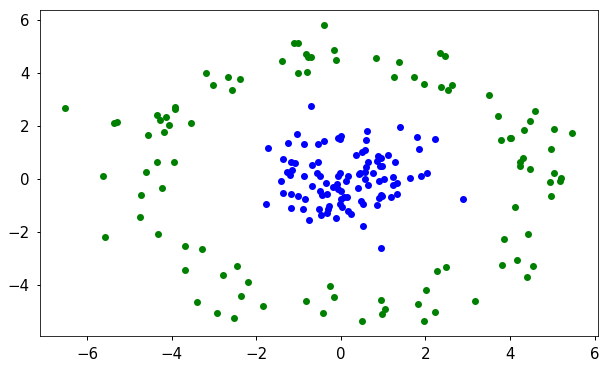

In [49]:
x_cos = np.random.randn(100, 2)
r = np.abs(np.random.randn(100)) + 4
fi = np.random.uniform(0.0, 2 * np.pi, size = 100)
y_cos = np.vstack((r * np.cos(fi), r * np.sin(fi))).T
plt.figure(figsize=(10, 6))
plot(x_cos[:,0], x_cos[:,1], 'bo')
plot(y_cos[:,0], y_cos[:,1], 'go')

### Example of RBF kernel
<a href='http://cs.stanford.edu/people/karpathy/svmjs/demo/'>Demo SVM</a>

------
# <span style="color:orange">Multiclass SVM (опционально) <span style="color:orange">
## $$ Y = \{1,..., K\}$$
Более детально см 3.2.2 <a href="http://www.machinelearning.ru/wiki/images/8/8e/Sem6_linear_2014.pdf"> здесь <a>

** Вопросы **
    * Как построить SVM для мультиклассовой задачи классификации?
    * Какие недостатки у подходов One-to-One и One-to-All?
    * В чём идея мультиклассового SVM?

## Решающее правило
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/imagemap.jpg" width="80%">

### Интерпретация
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/pixelspace.jpeg" width="80%">

<h1 align="center"> SVM Realization </h1>

#  SVM в Sklearn

In [25]:
all_categories = fetch_20newsgroups().target_names
all_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
categories = [
    'sci.electronics',
    'sci.space',
    'sci.med'
]
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2)) 

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipeline = Pipeline([("vectorizer", CountVectorizer(min_df=5, ngram_range=(1, 2))), ("algo", SVC())])

In [31]:
pipeline.fit(train_data.data, train_data.target)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
accuracy_score(pipeline.predict(test_data.data), test_data.target)

0.4175824175824176

** Задание **

1. Сравнить SVC с LinearSVC
2. Разобраться, какое ядро использует SVC по умолчанию
3. Объяснить, почему SVC работает настолько хуже в этом примере

# Реализация simple SVM
см. my_svm.ipynb


# Исследование SVM

In [78]:
# simulation of svm passes
def smo_svm(X, Y, C = 1.0, kernl = lambda a, b : np.dot(a.T, b), max_passes = 100, tol = 1e-12):
    
    
    ''' 
    X - train dataset
    Y - target vector
    C - penalty parameter of the error (inverse constant of regularization)
    kernl - kernel function
    
    max_passes  -  maximal number of iterations

    '''
    
    w = np.zeros(len(X))
    b = 0.0
    
    passes = 0
    iters = 0
    while passes < max_passes:
        
        if iters > 10000:
            print("10000 iters!!!")
            break
            
        num_changed_weights = 0
        
        # for objects in Learning Sample
        for i in range(len(X) - 1):

            Ei = svm_func(X[i,:], X, Y, w, b) - Y[i]
            
            if Y[i] * Ei < -tol and w[i] < C or Y[i] * Ei > tol and w[i] > 0.0:
                j = np.random.randint(i + 1, len(X))
                
                # print("optimizing %d %d" % (i, j))
                
                Ej = svm_func(X[j,:], X, Y, w, b) - Y[j]
                w_i_old = w[i]
                w_j_old = w[j]
                if (Y[i] != Y[j]):
                    L = max(0,w[j] - w[i])
                    H = min(C, C + w[j] - w[i])
                else:
                    L = max(0,w[i] + w[j] - C)
                    H = min(C,w[i] + w[j])
                    
                if (L == H):
                    continue
                    
                nu = 2 * kernl(X[i,:], X[j,:]) - kernl(X[i,:], X[i,:]) - kernl(X[j,:], X[j,:])
                
                if nu >= 0.0:
                    continue
                
                w[j] = w[j] - (Y[j] * (Ei - Ej)) / (nu)
                
                if w[j] > H:
                    w[j] = H
                
                if w[j] < L:
                    w[j] = L
                    
                if abs(w[j] - w_j_old) < 1e-7:
                    continue
                    
                w[i] = w[i] + Y[i] * Y[j] * (w_j_old - w[j])
                
                b1 = b - Ei - Y[i] * (w[i] - w_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (w[j] - w_j_old) * kernl(X[i,:], X[j,:])

                b2 = b - Ej - Y[i] * (w[i] - w_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (w[j] - w_j_old) * kernl(X[j,:], X[j,:])
                    
                if 0.0 < w[i] and w[i] < C:
                    b = b1
                elif 0.0 < w[j] and w[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                    
                num_changed_weights = num_changed_weights + 1
            
            iters += 1
            if num_changed_weights == 0:
                passes += 1
            else:
                passes = 0
    
    print('SVM converges in %d iters '% iters)                     

    return w, b

In [35]:
def svm_func(x, X, Y, w, b, ind = None, kernl = lambda a, b : np.dot(a.T, b)):
    ''' 
    x - sample
    X - train dataset
    Y - target vector
    w - vector of weights
    b - additive component (w_0)
    C - penalty parameter of the error (inverse constant of regularization)
    kernl - kernel function
    
    res - result margins of the sample x
    '''
    if ind is None:
        ind = range(len(X));
    res = 0.0
    for i in range(len(w)):
        res += %TODO%
    return res + b

** Задание ( для каждого датасета ниже) **:
    * Подберите оптимальну константу регуляризации
    * Какое должно быть ядро?

### The trivial example

In [79]:
# The trivial example
x = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.4]])
y = np.array([1.0, -1.0, 1.0, -1.0])

In [80]:
w, b = smo_svm(x, y, C= %TODO%)
w, b

SVM converges in 105 iters 


(array([2., 2., 0., 0.]), 1.0)

In [81]:
def plot_space_svm(x,y, w,b, kernl = lambda a , b : np.dot(a.T, b)):
    n = 10
    xx = np.linspace(np.min(x[:,0])-0.3, np.max(x[:,0]) + 0.3, n)
    yy = np.linspace(np.min(x[:,1])-0.3, np.max(x[:,1]) + 0.3, n)
    XX, YY = np.meshgrid(xx, yy)

    F = np.zeros_like(XX)
    for i in range(len(xx)):
        for j in range(len(xx)):
            F[j,i] = svm_func(np.array([xx[i], yy[j]]), x, y, w, b, kernl=kernl)

    plt.figure(figsize=(14, 4))
    contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
    clabel(contour(xx, yy, F, 8, colors='black'), inline=1, fontsize=10)
    for i in range(len(x)):
        if y[i] == 1.0:
            plot(x[i,0], x[i,1], 'bo')
        else:
            plot(x[i, 0], x[i,1], 'go')

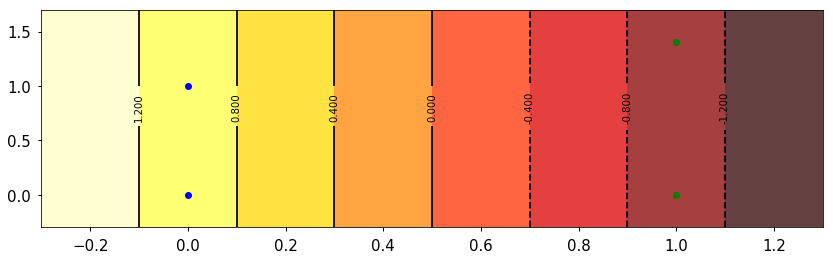

In [82]:
plot_space_svm(x,y, w,b)

### Not-separable dataset

In [83]:
# random dataset
x = np.random.randn(20,2)
x[10:,0] += 3
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [85]:
w, b = smo_svm(x, y, C= %TODO%)
w, b

SVM converges in 798 iters 


(array([0.5       , 0.        , 0.24731163, 0.        , 0.        ,
        0.        , 0.        , 0.13867177, 0.        , 0.        ,
        0.15506712, 0.        , 0.        , 0.        , 0.        ,
        0.23091628, 0.        , 0.5       , 0.        , 0.        ]),
 1.6980496020112659)

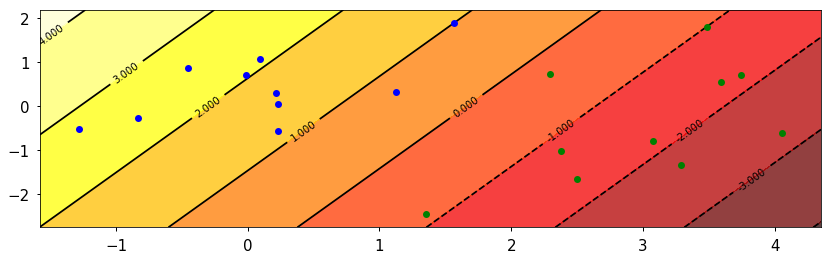

In [86]:
plot_space_svm(x,y, w,b)

### Another not-separable dataset

In [87]:
# dataset
x = np.random.randn(20,2)
x[10:,0] += 2
x[10:,:] *= 1.5
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [88]:
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, gamma=0.1):
    return (np.exp(-gamma*np.dot(x-y, x-y)))

In [89]:
# Learn Kernel SVM
w, b = smo_svm(x, y, C= %TODO%, kernl=polynomial_kernel)

SVM converges in 3920 iters 


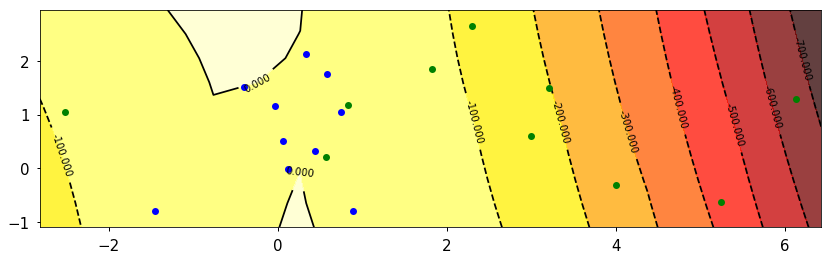

In [90]:
# Draw polynomial Kernel
plot_space_svm(x,y, w,b, kernl=polynomial_kernel)

In [91]:
# Learn Kernel SVM
w, b = smo_svm(x, y, C=1.0, kernl=gaussian_kernel)

SVM converges in 4087 iters 


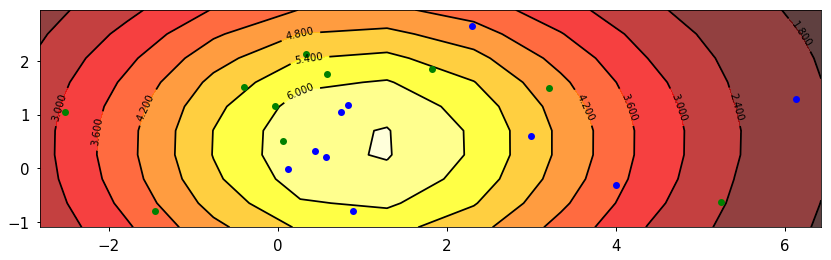

In [93]:
# Draw gaussian Kernel
plot_space_svm(x,y, w,b, kernl=gaussian_kernel)

### Tricky set
see above

In [105]:
# Learn SVM
w, b = smo_svm(X_train_trickyset, Y_train_trickyset, C=1.0)

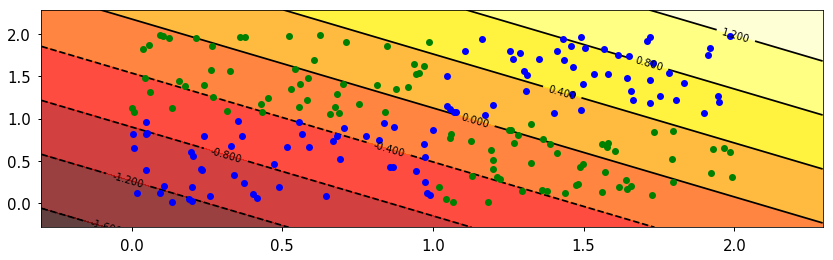

In [107]:
plot_space_svm(X_train_trickyset, Y_train_trickyset, w,b)

SVM converges in 8832 iters 


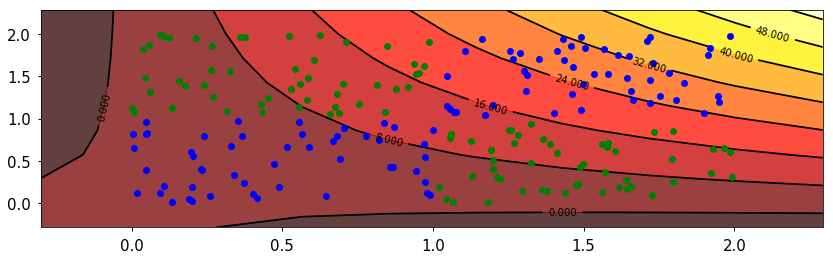

In [110]:
# Learn Kernel SVM
w, b = smo_svm(X_train_trickyset, Y_train_trickyset, C= %TODO%, kernl=polynomial_kernel)
plot_space_svm(X_train_trickyset, Y_train_trickyset, w,b, kernl=polynomial_kernel)

10000 iters!!!
SVM converges in 10047 iters 


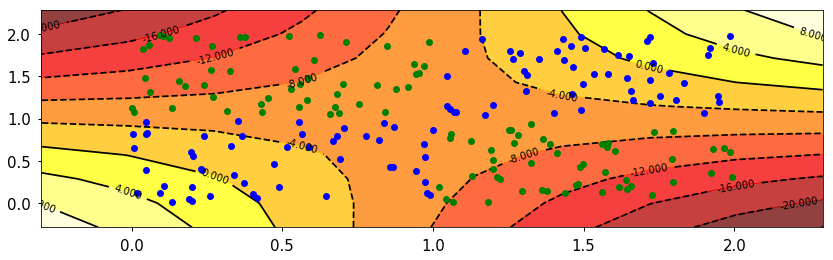

In [132]:
# Learn Kernel SVM
w, b = smo_svm(X_train_trickyset, Y_train_trickyset, C= %TODO%, kernl=gaussian_kernel)
plot_space_svm(X_train_trickyset, Y_train_trickyset, w,b, kernl=gaussian_kernel)

# SVM with CVXOPT

### Convex optimization package
conda install -c anaconda cvxopt # For anaconda: https://anaconda.org/anaconda/cvxopt

!pip install cvxopt  # for other env

In [135]:
from cvxopt import matrix, solvers

### QP-solver (cvxopt)

* [Библиотека CVXOPT](http://cvxopt.org/)
* [Документация библиотеки](http://cvxopt.org/documentation/index.html)
* [Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)
* [Задача квадратичного программирования](http://cvxopt.org/examples/tutorial/qp.html)

## $$ xQx + px \rightarrow \min\limits_{w}$$
## $$ Gx\geq h $$
## $$ Ax = b $$

In [210]:
# The real_SVM
def the_svm(X, Y, C = 1.0, kernl = lambda a , b : np.dot(a.T, b)):

    n_samples, n_features = X.shape

    M = np.zeros((n_samples, n_samples))

    for i in range(len(X)):
        for j in range(len(X)):
            M[i, j] = kernl(X[i,:], X[j,:]) * Y[i] * Y[j]
    
    P = matrix(M)
    q = matrix(np.ones(n_samples) * -1)
    A = matrix(Y_train_trickyset, (1,n_samples), tc='d')
    b = matrix(0.0)

    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples) * C
    h = matrix(np.hstack((tmp1, tmp2)))

    solution =solvers.qp(P, q, G, h, A, b)
    lambd = np.ravel(solution['x'])

    sv = lambd > 1e-10
    ind = np.arange(len(lambd))[sv]
    b = 0.0
    for n in ind:
        b += Y[n]
        for m in ind:
            b -= %TODO%
    b /= len(ind)
    
    return lambd, b, ind

     pcost       dcost       gap    pres   dres
 0:  5.8416e+06 -5.2425e+07  6e+07  7e-12  4e-12
 1:  1.9414e+06 -4.6445e+06  7e+06  7e-12  5e-12
 2:  3.8759e+05 -6.6503e+05  1e+06  1e-16  3e-12
 3:  5.9767e+04 -1.2176e+05  2e+05  1e-11  2e-12
 4:  1.9226e+04 -7.5354e+04  9e+04  2e-12  2e-12
 5:  2.8296e+03 -5.4477e+04  6e+04  9e-12  2e-12
 6: -8.8005e+03 -3.9057e+04  3e+04  2e-12  2e-12
 7: -1.5761e+04 -3.1275e+04  2e+04  9e-12  2e-12
 8: -1.9053e+04 -2.8217e+04  9e+03  4e-12  2e-12
 9: -2.0566e+04 -2.7085e+04  7e+03  5e-12  2e-12
10: -2.2163e+04 -2.5402e+04  3e+03  1e-11  2e-12
11: -2.3290e+04 -2.4115e+04  8e+02  2e-12  2e-12
12: -2.3621e+04 -2.3742e+04  1e+02  5e-12  2e-12
13: -2.3678e+04 -2.3680e+04  2e+00  7e-12  2e-12
14: -2.3679e+04 -2.3679e+04  2e-02  7e-12  2e-12
Optimal solution found.


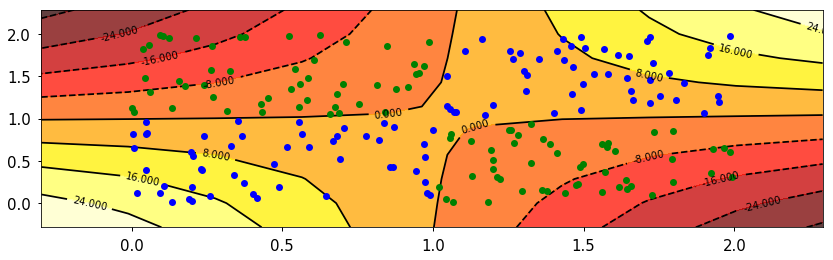

In [211]:
w, b, ind = the_svm(X_train_trickyset, Y_train_trickyset, C = %TODO%, kernl= %TODO%)
plot_space_svm(X_train_trickyset, Y_train_trickyset, w,b, kernl= %TODO%)

<h1 align="center"> Additional </h1>

## Разбор прикладной задачи: оптимизация бюджета рекламной кампании
<img src="https://zhazhda.biz/wp-content/uploads/2017/03/bolshaya-1.png" width=40%>

К вам обращается крупное рекламное агентство. Они хотят пускать рекламную кампанию по телевизору, однако, не понимают сколько рекламы на каждом телевизионном канале (всего телеканалов $n$) нужно заказать.

* ** Бизнес-ограничения **
    1. У каждой рекламной кампании есть своя целевая аудитория, и успешность мероприятия определяется по показателям в срезе ЦА.
    2. Для каждого среза считается величина «охват k+» - сколько человек посмотрело рекламный ролик k и более раз и «точность» сколько людей, просмотревших ролик из данного среза.
    3. Упрощение задачи: считаем, что на телеканале не покупается фиксированная реклама (когда мы точно знаем когда будет ролик показан), а только плавающие размещения (ролик будет показан в случайный момент суток)
    4. Нужно оптимизировать суммарный бюджет кампании, получив определённые значения охвата 5+ и точности ЦА.
    
* ** Как измерить результат **
    1. Проверять экономию бессмысленно (так как мы, в любом случае, тратим меньше). Надо проверять охват и точность.
    2. АБ тест нельзя просто так сделать, кампания это очень долгий процесс (2-3 месяца)
    3. Можно требовать, чтобы с вероятностью 95% охват и точность были не ниже, чем те, что мы предсказали.
    
* **Вопросы:**
    1. Как поставить задачу машинного обучения? Что есть целевая переменная?
    2. Какие признаки следует добавить в обучающую выборку? Сколько их будет?
    3. Какое взять решающее правило?
    4. Если до сих пор было всего 20 кампаний, какое тогда решающее правило взять?
    
** Подход к решению:** https://gist.github.com/aromanenko/24885f17493d2cafa1cb9b59faf8137c 

# HW2: solution

# HW5: explanation


# <span style="color:orange">Vowpal Wabbit (опционально)</span>
see vw.ipynb

<h1 align="center">Заключение</h1>  

** SVM **
* Достоинства
    - Сильная обощающая способность
    - Выпуклая задача оптимизация (наличие решения)
    - Не нужны все объекты обучающей выборки для обучения
* Недостатки:
    - Неясно, как строить ядро (переход в спрямляющее простантсво)



** Обратная связь ** 
  * оцените <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> семинар </a>
  * оставьте <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции